In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder



In [3]:
data = pd.read_csv('sample_data/diamonds.csv')

In [4]:
print("Информация о данных:")
print(data.info())
print("\n Описание числовых признаков:")
print(data.describe())

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB
None

 Описание числовых признаков:
         Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
st

In [5]:
missing_values = data.isnull().sum()
print("\nПропуски в данных:")
print(missing_values)


Пропуски в данных:
Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


In [6]:
data = data.drop(columns=['Unnamed: 0'])

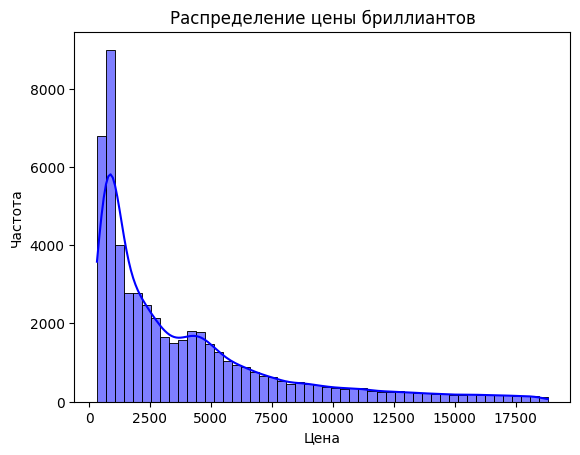

In [7]:
sns.histplot(data['price'], kde=True, bins=50, color='blue')
plt.title("Распределение цены бриллиантов")
plt.xlabel("Цена")
plt.ylabel("Частота")
plt.show()

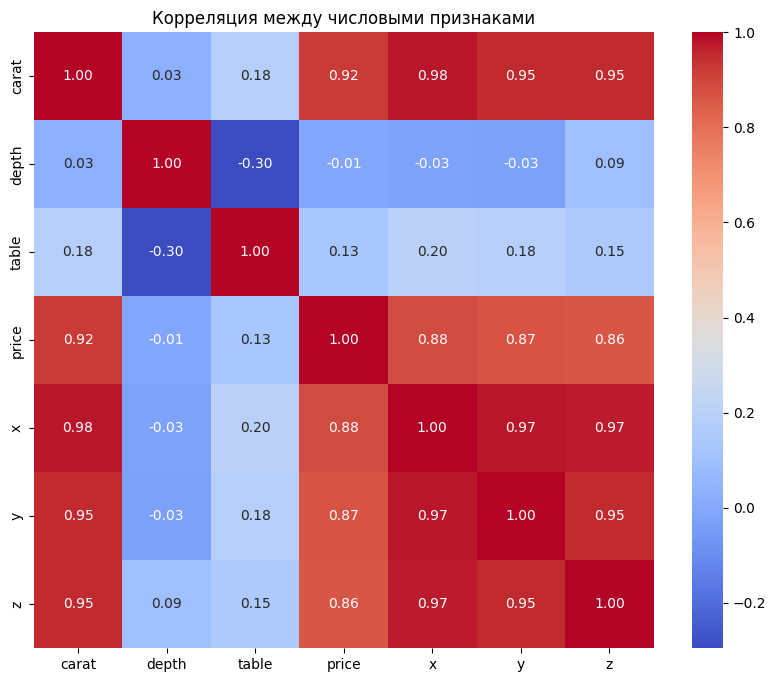

In [12]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title("Корреляция между числовыми признаками")
plt.show()


In [10]:
categorical_cols = ['cut', 'color', 'clarity']
encoder = OneHotEncoder(sparse_output=False, drop='first')
categorical_encoded = pd.DataFrame(
    encoder.fit_transform(data[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols)
)

numerical_cols = ['carat', 'depth', 'table', 'x', 'y', 'z']
data_prepared = pd.concat([data[numerical_cols], categorical_encoded], axis=1)

In [ ]:
X = data_prepared
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nМетрики модели:")
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Коэффициент детерминации (R^2): {r2:.2f}")



Метрики модели:
Среднеквадратичная ошибка (MSE): 1288705.48
Коэффициент детерминации (R^2): 0.92


In [ ]:
feature_importance = pd.DataFrame({
    'Признак': X.columns,
    'Коэффициент': model.coef_
}).sort_values(by='Коэффициент', key=abs, ascending=False)

print("\nВажность признаков:")
print(feature_importance)


Важность признаков:
          Признак   Коэффициент
0           carat  11280.784327
16     clarity_IF   5365.944596
21   clarity_VVS1   5015.292916
22   clarity_VVS2   4958.211449
19    clarity_VS1   4579.905541
20    clarity_VS2   4263.615635
17    clarity_SI1   3675.414552
18    clarity_SI2   2701.439970
15        color_J  -2372.019835
14        color_I  -1479.584470
3               x  -1008.041596
13        color_H   -999.086408
7       cut_Ideal    858.815946
8     cut_Premium    781.928178
9   cut_Very Good    749.952180
6        cut_Good    591.797169
12        color_G   -495.581527
11        color_F   -279.716403
10        color_E   -218.198603
1           depth    -65.091015
5               z    -36.463370
2           table    -26.600021
4               y     -3.528450


<ipython-input-23-437385c298a3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Коэффициент', y='Признак', palette='viridis')


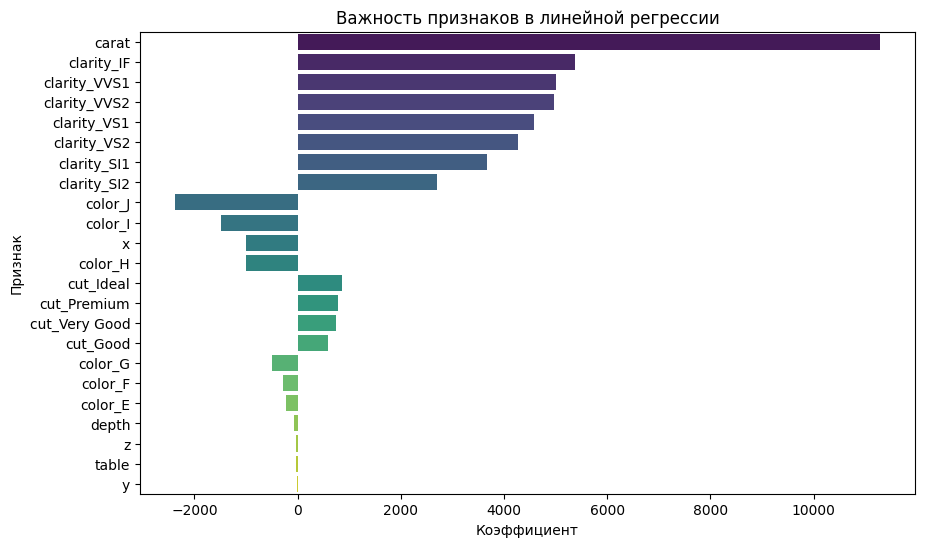

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Коэффициент', y='Признак', palette='viridis')
plt.title("Важность признаков в линейной регрессии")
plt.show()

In [ ]:
print("1. Наибольшее влияние на цену имеют вес бриллианта (carat), а также размеры (x, y, z) (ну больше всего x).")
print("2. Качество огранки (cut), цвет (color) и чистота (clarity) также значимы, но их влияние меньше.")

1. Наибольшее влияние на цену имеют вес бриллианта (carat), а также размеры (x, y, z).
2. Качество огранки (cut), цвет (color) и чистота (clarity) также значимы, но их влияние меньше.
